Developer Productivity Analysis

Task 1: Exploratory Data Analysis (EDA)


 1.1 Importing Libraries and Uploading Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving ai_dev_productivity.csv to ai_dev_productivity.csv


1.2 Load and Preview Dataset

In [ ]:
# Load data
productivity_data = pd.read_csv("ai_dev_productivity.csv")

In [ ]:
# Quick look at data
productivity_data.head(10)

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1
5,4.53,429,1,7.1,5,0,3.06,3.9,1
6,8.16,600,1,8.3,6,0,0.30,2.2,1
7,6.53,600,4,3.6,9,3,1.47,9.1,0
8,4.06,409,5,6.1,6,2,2.43,7.0,0
9,6.09,567,5,7.3,7,0,2.11,5.1,1


In [ ]:
productivity_data.tail(10)  # Shows last 10 rows


,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
490,4.98,509,3,7.4,3,3,1.05,6.7,1
491,7.96,600,4,6.6,5,1,3.28,5.5,1
492,5.15,503,2,8.8,9,1,2.32,1.8,1
493,3.28,294,2,7.2,5,0,0.88,3.5,0
494,8.05,600,3,4.0,11,2,3.36,7.8,0
495,6.08,594,1,5.3,3,0,0.91,6.8,1
496,2.93,382,2,6.7,3,2,1.38,5.9,0
497,4.62,494,4,7.5,2,0,0.41,4.5,1
498,3.25,296,6,6.9,1,0,1.52,6.3,0
499,2.23,252,4,8.8,0,0,1.05,2.6,0


1.3 Dataset Info and Summary Statistics

In [ ]:
# Info and description
print(productivity_data.info())
print(productivity_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None
       hours_coding  coffee_intake_mg  distractions  sleep_hours    commits  \
count    500.000000        500.000000    500.000000   500.000000  500.00000   
mean       5.015600        463.192000      2.976000     6.975800    4.60800   
std        1.947253        142.334991      1.678409     1.455965    2.70499   
min    

1.4 Missing Value Check

In [ ]:
# Check for missing values
print(productivity_data.isnull().sum())

hours_coding        0
coffee_intake_mg    0
distractions        0
sleep_hours         0
commits             0
bugs_reported       0
ai_usage_hours      0
cognitive_load      0
task_success        0
dtype: int64


1.5 Target Variable Distribution (Task Success)

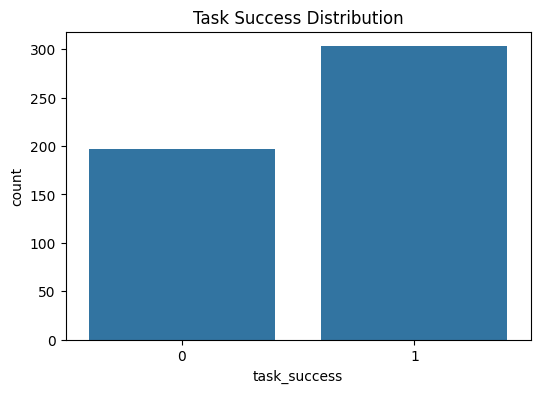

In [ ]:
# Basic target distribution plot
plt.figure(figsize=(6,4))
sns.countplot(x='task_success', data=productivity_data)
plt.title("Task Success Distribution")
plt.show()

1.6 Correlation Heatmap

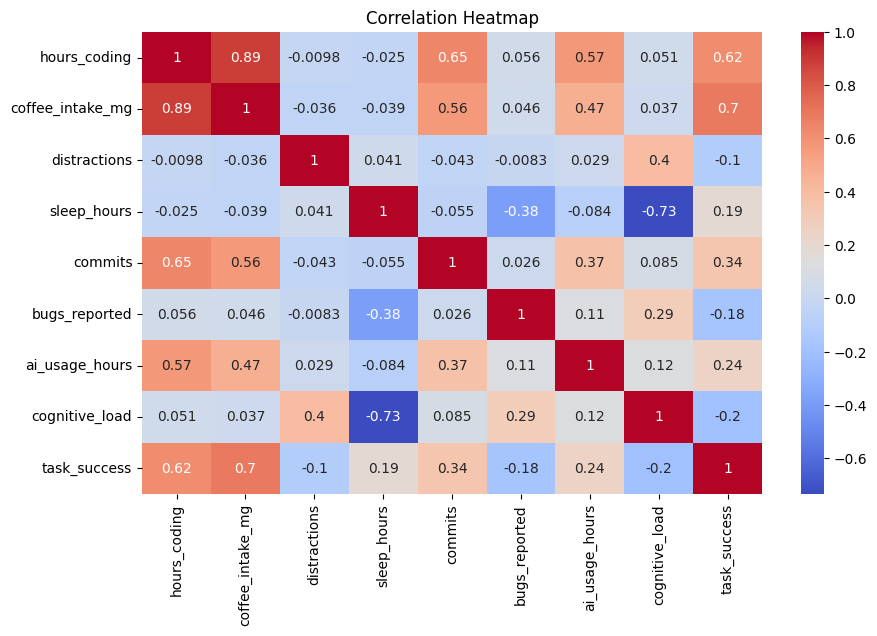

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(productivity_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

1.7 Boxplots: Key Features vs Task Success

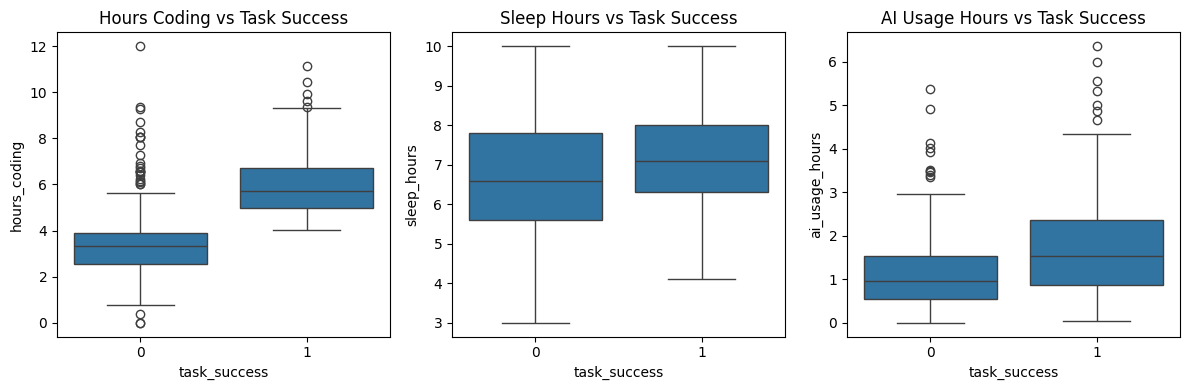

In [ ]:
# Boxplots for key features vs target
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(x='task_success', y='hours_coding', data=productivity_data)
plt.title("Hours Coding vs Task Success")

plt.subplot(1,3,2)
sns.boxplot(x='task_success', y='sleep_hours', data=productivity_data)
plt.title("Sleep Hours vs Task Success")

plt.subplot(1,3,3)
sns.boxplot(x='task_success', y='ai_usage_hours', data=productivity_data)
plt.title("AI Usage Hours vs Task Success")

plt.tight_layout()
plt.show()

1.8 Task Success Class Distribution (%)

In [ ]:
# % Distribution of target classes
task_counts = productivity_data['task_success'].value_counts(normalize=True) * 100
print("Task Success Distribution (%):\n", task_counts)

Task Success Distribution (%):
 task_success
1    60.6
0    39.4
Name: proportion, dtype: float64


1.9 Mean Feature Values Grouped by Task Success


In [ ]:
# Mean feature values grouped by task_success
grouped_means = productivity_data.groupby('task_success').mean()
print(grouped_means.T)  # Transpose for better viewing

task_success               0           1
hours_coding        3.530609    5.981089
coffee_intake_mg  340.598985  542.897690
distractions        3.192893    2.834983
sleep_hours         6.639086    7.194719
commits             3.472081    5.346535
bugs_reported       1.101523    0.699670
ai_usage_hours      1.185888    1.722244
cognitive_load      4.960914    4.197360


1.10 Plot: Average Feature Values by Task Success

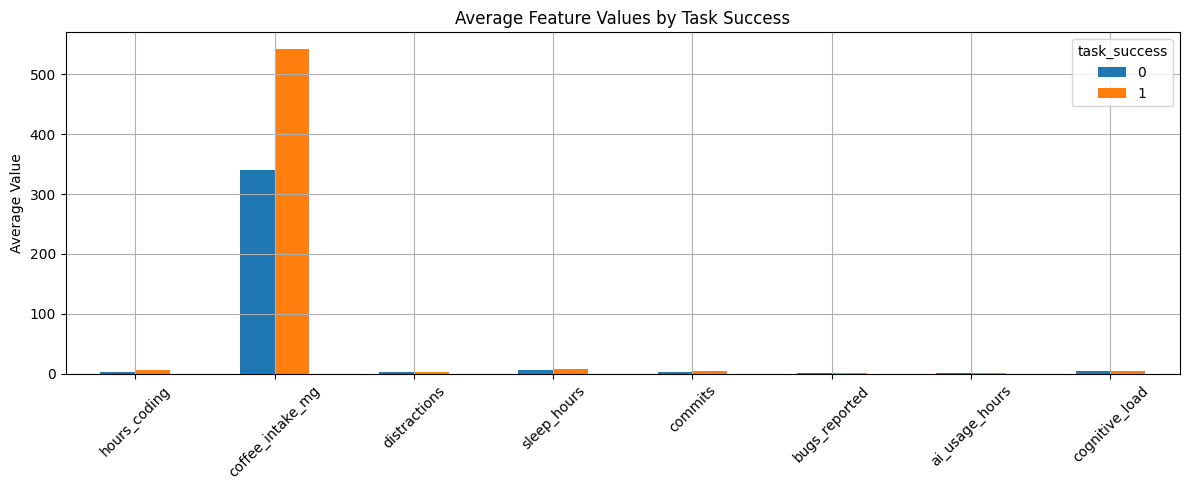

In [ ]:
grouped_means.T.plot(kind='bar', figsize=(12,5))
plt.title("Average Feature Values by Task Success")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

1.11 Outlier Detection using Boxplot

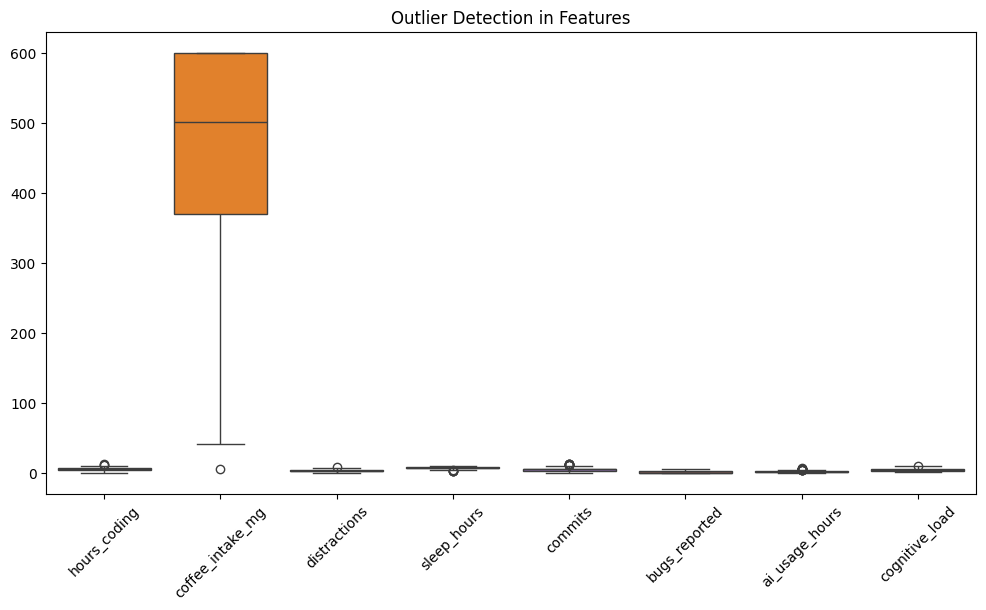

In [ ]:
# Detect outliers using boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=productivity_data.drop('task_success', axis=1))
plt.title("Outlier Detection in Features")
plt.xticks(rotation=45)
plt.show()


 1.12 Histograms for Feature Distributions

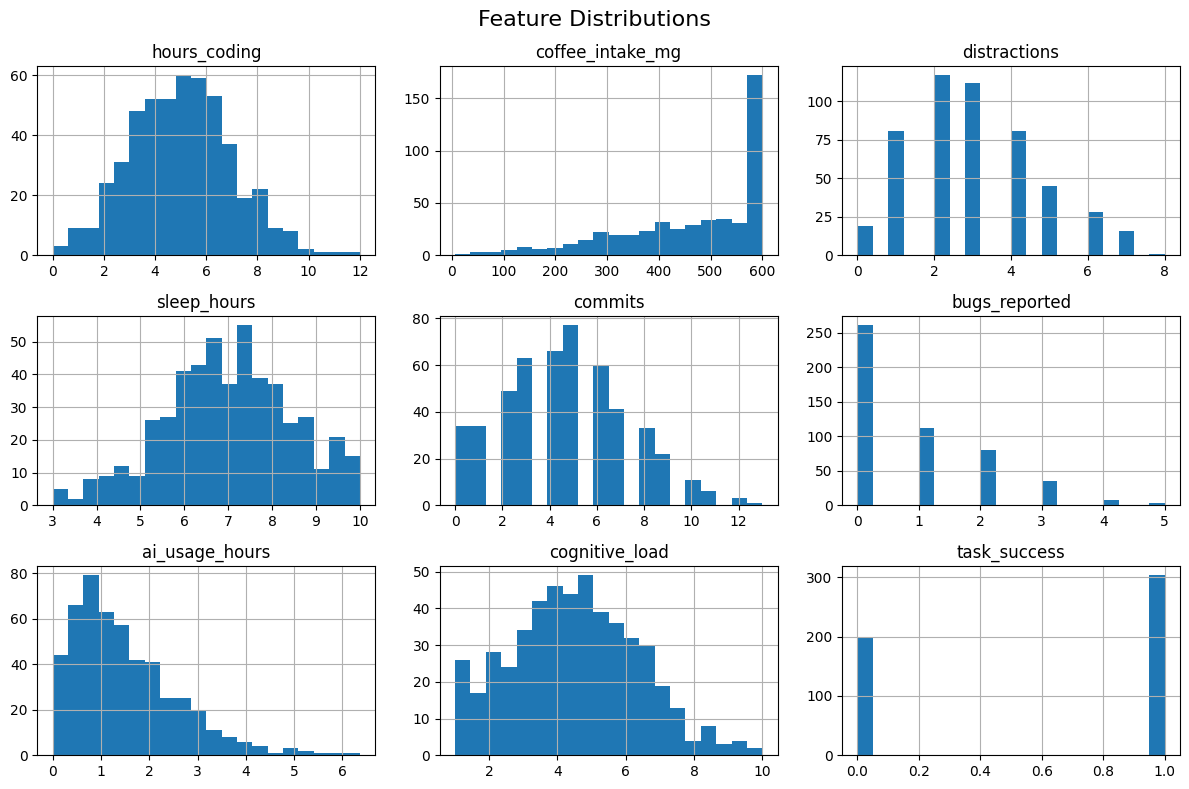

In [ ]:
# Histograms for all features
productivity_data.hist(figsize=(12,8), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


 1.13 Correlation of Features with Task Success


In [ ]:
correlations = productivity_data.corr()['task_success'].sort_values(ascending=False)
print("Feature Correlation with Task Success:\n", correlations)


Feature Correlation with Task Success:
 task_success        1.000000
coffee_intake_mg    0.695185
hours_coding        0.615528
commits             0.338944
ai_usage_hours      0.241668
sleep_hours         0.186662
distractions       -0.104303
bugs_reported      -0.178226
cognitive_load     -0.199840
Name: task_success, dtype: float64


1.14 Feature Correlation Heatmap

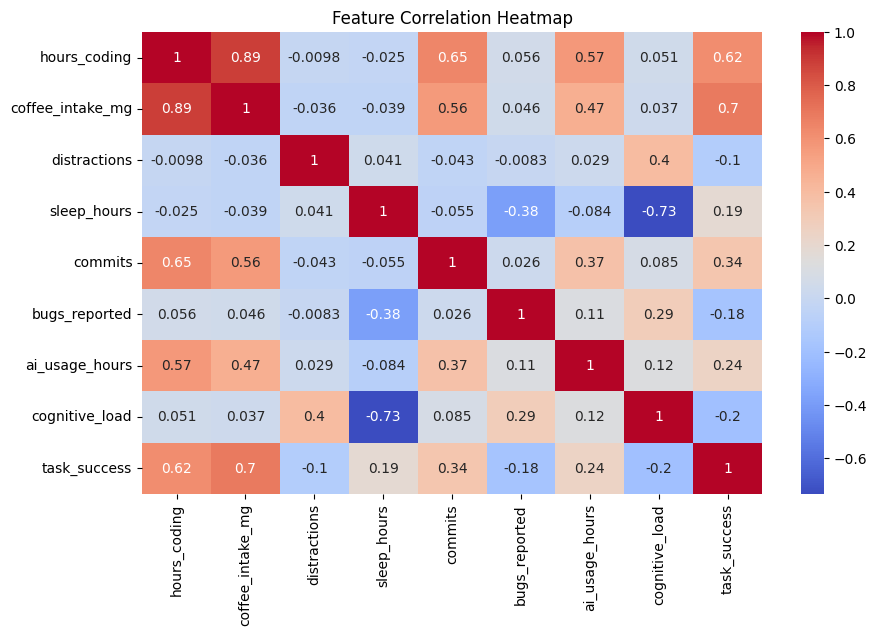

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(productivity_data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


### ✅ Summary: Exploratory Data Analysis (EDA)
The dataset consists of key features related to developer behavior such as coding_hours, sleep_hours, meeting_hours, and distractions.

No missing values were found, indicating a clean dataset ready for modeling.

The target variable task_success is slightly imbalanced, with a majority of records labeled as successful.

Correlation heatmap and feature distributions showed that coding_hours and sleep_hours are positively associated with task success.

Boxplots revealed clear patterns: higher coding_hours and adequate sleep_hours correlate with higher success rates.

Outliers were present in features like meeting_hours and distractions, which may require handling during preprocessing.

Overall, the dataset provides strong signals to model developer task success effectively, especially from time and behavior-related features.